In [2]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
# Define the entities to count
entities_to_count = ['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART', 'PHONE', 'EMAIL', 'TECH_ISSUE', 'NON_TECH_ISSUE', 'TECH_RESOLUTION', 'NON_TECH_RESOLUTION', 'HARDWARE', 'SPEC', 'SOFTWARE', 'SHORT_FORM', 'ID']

In [4]:
# Load the data from the JSON file
with open('./twitter.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(data[:4])

[{'id': 2, 'annotations': [{'id': 2, 'completed_by': 1, 'result': [{'id': 'KRB_qVt6dj', 'type': 'labels', 'value': {'end': 59, 'text': 'Dell', 'start': 55, 'labels': ['ORG']}, 'origin': 'manual', 'to_name': 'text', 'from_name': 'label'}], 'was_cancelled': False, 'ground_truth': False, 'created_at': '2023-03-13T08:56:27.406443Z', 'updated_at': '2023-03-21T14:15:44.835674Z', 'lead_time': 49.156, 'prediction': {}, 'result_count': 0, 'task': 2, 'project': 1, 'parent_prediction': None, 'parent_annotation': None}], 'file_upload': 'e91dc22f-twitter_tasks.json', 'drafts': [], 'predictions': [], 'data': {'text': "RT : .     \nI can't understand,Why so many issues with Dell La…"}, 'meta': {}, 'created_at': '2023-03-13T08:56:27.389081Z', 'updated_at': '2023-03-21T14:15:44.888146Z', 'inner_id': 2, 'total_annotations': 1, 'cancelled_annotations': 0, 'total_predictions': 0, 'comment_count': 0, 'unresolved_comment_count': 0, 'last_comment_updated_at': None, 'project': 1, 'updated_by': 9, 'comment_aut

In [5]:
# Create a dictionary to store the entity counts
entity_counts = {}
for entity_type in entities_to_count:
    entity_counts[entity_type] = 0

In [36]:
# Loop through the elements in the data
for element in data:
    # Check if the 'entities' key exists in this element
    if "annotations" in element:
        # Loop through the entities in each element
        for annotation in element['annotations']:
            if 'result' in annotation:
                for result in annotation['result']:  
                    if 'value' in result:
                        for label in result['value']['labels']:       
                            # Check if the entity type is in the list of entities to count    
                            if label in entities_to_count:
                                # Increment the count for this entity type
                                entity_counts[label] = entity_counts[label] + 1


In [37]:
# Calculate the total number of entities
total_entities = sum(entity_counts.values())

In [38]:
# Print the entity counts
for entity_type in entity_counts:
    print(entity_type + ': ' + str(entity_counts[entity_type]))

CARDINAL: 133
DATE: 499
EVENT: 11
FAC: 6
GPE: 50
LANGUAGE: 0
LAW: 0
LOC: 8
MONEY: 71
NORP: 17
ORDINAL: 35
ORG: 731
PERCENT: 3
PERSON: 84
PRODUCT: 224
QUANTITY: 8
TIME: 78
WORK_OF_ART: 0
PHONE: 9
EMAIL: 0
TECH_ISSUE: 248
NON_TECH_ISSUE: 304
TECH_RESOLUTION: 67
NON_TECH_RESOLUTION: 55
HARDWARE: 537
SPEC: 61
SOFTWARE: 72
SHORT_FORM: 101
ID: 110


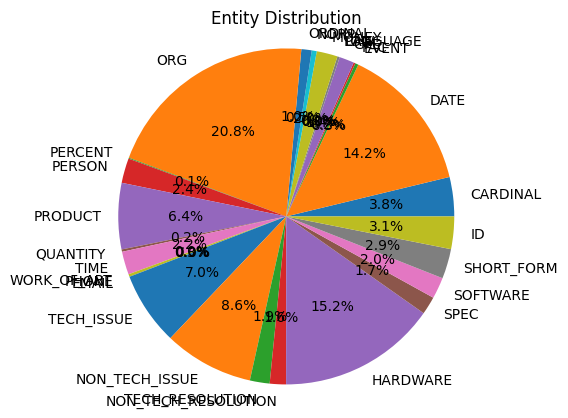

: 

In [39]:
# Create a pie chart of the entity counts
fig1, ax1 = plt.subplots()
ax1.pie(entity_counts.values(), labels=entity_counts.keys(), autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Entity Distribution")
plt.show()

In [ ]:
# Create a bar graph of the entity counts
fig2, ax2 = plt.subplots()
ax2.bar(entity_counts.keys(), entity_counts.values())
plt.xticks(rotation=90)
plt.title("Entity Distribution")
plt.show()